In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import copy
import math
import random

In [2]:
df_sub = pd.read_pickle('/Users/reesezhuang/Desktop/NYU Stern/Final individual/subscribers')
df_eng = pd.read_pickle('/Users/reesezhuang/Desktop/NYU Stern/Final individual/engagement')
df_cus = pd.read_pickle('/Users/reesezhuang/Desktop/NYU Stern/Final individual/customer_service_reps')

In [3]:
df_cus

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [4]:
df_sub.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


In [5]:
df_sub.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type'],
      dtype='object')

# 1. Data preprocessing for subscribers dataset

In [6]:
df_sub1 = df_sub.iloc[:,[0,      2,5,8,16,24,   1,3,4,7,9,13,20,27 ]].reset_index(drop=True)
#                                 subid   continue.      dummy.  

## 1.1 Remove null rows

In [7]:
df_sub1['num_weekly_services_utilized'] = df_sub1['num_weekly_services_utilized'].fillna(0.0)
df_sub1['weekly_consumption_hour'] = df_sub1['weekly_consumption_hour'].fillna(0.0)
df_sub1['preferred_genre'] = df_sub1['preferred_genre'].fillna('unknown')
df_sub1['intended_use'] = df_sub1['intended_use'].fillna('unknown')

In [8]:
df_sub1.dropna(inplace=True)
df_sub1.reset_index(drop=True,inplace=True)

## 1.2 Change to 1/0

In [9]:
df_sub1['retarget_TF'] = df_sub1['retarget_TF'].apply(lambda x: int(x))
df_sub1['male_TF'] = df_sub1['male_TF'].apply(lambda x: int(x))

In [10]:
df_sub1['op_sys'] = df_sub1['op_sys'].apply(lambda x: 1 if x == 'Android' else 0)
df_sub1['cancel_before_trial_end'] = df_sub1['cancel_before_trial_end'].apply(lambda x: int(x))
df_sub1['refund_after_trial_TF'] = df_sub1['refund_after_trial_TF'].apply(lambda x: int(x))

## 1.3 to_dummy

In [11]:
#add range to age so can to_dummy
col = 'age'
conditions = [(df_sub1[col] > 13) & (df_sub1[col] <= 20),
              (df_sub1[col] > 20) & (df_sub1[col] <= 40),
              (df_sub1[col] > 40) & (df_sub1[col] <= 60),
              (df_sub1[col] > 60)]

In [12]:
choices = ["teenagers", 'adults', 'middle_aged_adults', 'retired']
df_sub1['age'] = np.select(conditions, choices)

In [13]:
churn_dummy = pd.get_dummies(df_sub1,
               columns=['preferred_genre','intended_use','package_type','age'],
               prefix=['genre:','use:','package:','age_range:'])

# 2. Data preprocessing for other dataset

In [14]:
churn_TF = df_cus[['subid','current_sub_TF','payment_period']].groupby('subid').max('payment_period').reset_index()
churn_TF['current_sub_TF'] = churn_TF['current_sub_TF'].apply(lambda x: -999 if x == False else 111)
churn_TF['current_sub_TF'] = churn_TF['current_sub_TF'].apply(lambda x: True if x == -999 else False)
churn_TF = churn_TF.rename(columns = {'current_sub_TF':'churn_TF'})

# engagement
churn_eng = df_eng.iloc[:,[0,2,4,5,6,7]]
churn_eng = churn_eng.groupby('subid').mean().reset_index()


# 3. Merge all dataset

In [15]:
# merge
churn_sub_merge_half = churn_TF.merge(churn_dummy, on='subid', how='left').dropna().reset_index(drop=True)
churn_sub_merge = churn_sub_merge_half.merge(churn_eng, on='subid', how='left').dropna().reset_index(drop=True)
churn_sub_merge['payment_period'] = churn_sub_merge['payment_period'].astype(float)

In [16]:
churn_sub_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86640 entries, 0 to 86639
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   subid                             86640 non-null  int64  
 1   churn_TF                          86640 non-null  bool   
 2   payment_period                    86640 non-null  float64
 3   num_weekly_services_utilized      86640 non-null  float64
 4   weekly_consumption_hour           86640 non-null  float64
 5   monthly_price                     86640 non-null  float64
 6   join_fee                          86640 non-null  float64
 7   retarget_TF                       86640 non-null  float64
 8   male_TF                           86640 non-null  float64
 9   op_sys                            86640 non-null  float64
 10  cancel_before_trial_end           86640 non-null  float64
 11  refund_after_trial_TF             86640 non-null  float64
 12  genr

In [17]:
churn_sub_merge.to_csv('churnsub.csv')

In [18]:
random.seed(1)
df_train, df_test = model_selection.train_test_split(churn_sub_merge, test_size=0.4)

In [19]:
churn_sub_merge.columns

Index(['subid', 'churn_TF', 'payment_period', 'num_weekly_services_utilized',
       'weekly_consumption_hour', 'monthly_price', 'join_fee', 'retarget_TF',
       'male_TF', 'op_sys', 'cancel_before_trial_end', 'refund_after_trial_TF',
       'genre:_comedy', 'genre:_drama', 'genre:_international', 'genre:_other',
       'genre:_regional', 'genre:_unknown', 'use:_access to exclusive content',
       'use:_education', 'use:_expand international access',
       'use:_expand regional access', 'use:_other', 'use:_replace OTT',
       'use:_supplement OTT', 'use:_unknown', 'package:_base',
       'package:_economy', 'package:_enhanced', 'age_range:_0',
       'age_range:_adults', 'age_range:_middle_aged_adults',
       'age_range:_retired', 'age_range:_teenagers', 'app_opens',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started'],
      dtype='object')

In [20]:
churn_sub_merge.drop('age_range:_0', axis=1, inplace=True)

# 4.Churn Model

In [21]:
# ------ DEFINE FUNCTIONS -----
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

In [22]:
def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [23]:
# ----- FIT CHURN MODEL ------
y_col_name = 'churn_TF'  # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name = [
       'num_weekly_services_utilized','payment_period', 
       'weekly_consumption_hour', 'join_fee', 'retarget_TF','monthly_price', 
       'male_TF', 'op_sys', #'cancel_before_trial_end', 'refund_after_trial_TF',
       'genre:_comedy', 'genre:_drama', 'genre:_international', 'genre:_other',
       'genre:_regional','use:_access to exclusive content', 'genre:_unknown', 
       'use:_education', 'use:_expand international access',
       'use:_expand regional access', 'use:_other', 'use:_replace OTT',
       'use:_supplement OTT', 'package:_base','use:_unknown', 
       'package:_economy', 'package:_enhanced', 'age_range:_adults',
       'age_range:_middle_aged_adults', 'age_range:_retired',
       'age_range:_teenagers', 'app_opens', 'num_videos_completed',
       'num_videos_rated',#'num_videos_more_than_30_seconds', 
       'num_series_started'
] 

add_constant_TF = True

# --- preprocess data for model routine format requirements
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

In [24]:
# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     2701.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:38:11   Log-Likelihood:                 1106.6
No. Observations:               51984   AIC:                            -2151.
Df Residuals:                   51953   BIC:                            -1877.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [25]:
# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.160583
         Iterations 9

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:                51984
Model:                          Logit   Df Residuals:                    51953
Method:                           MLE   Df Model:                           30
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                  0.6523
Time:                        17:38:12   Log-Likelihood:                -8347.7
converged:                       True   LL-Null:                       -24011.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
num_weekly_services_utilized   

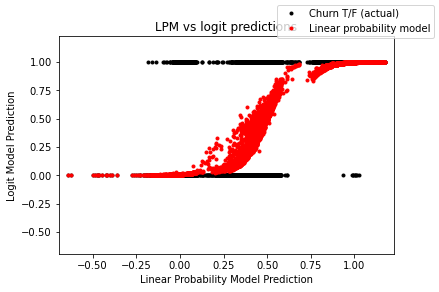

In [26]:

# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

fig = plt.figure()
ax = plt.gca()
ax.plot(df_test['prob_churn_lpm'], df_test['churn_TF'], 'k.')
ax.plot(df_test['prob_churn_lpm'], df_test['prob_churn_logit'], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

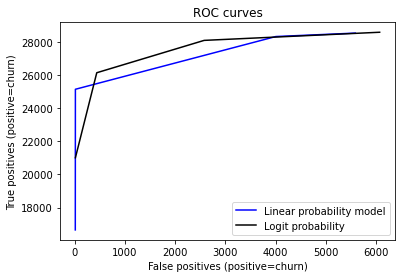

In [27]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])

# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'k-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

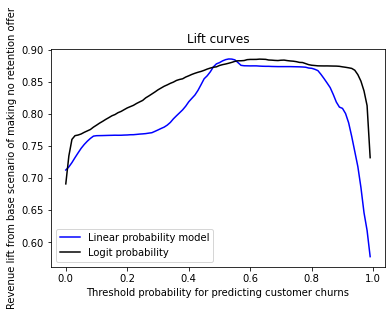

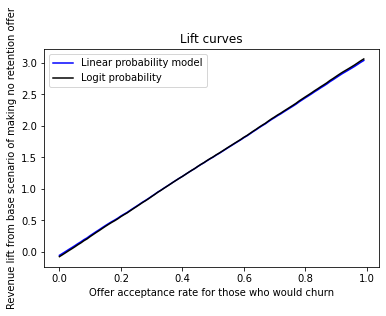

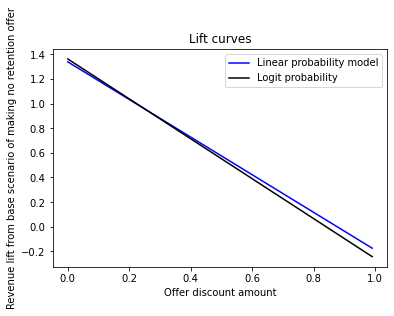

In [28]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 4.9
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    t_acceptance_rate_churn = t_discount_amount ** 2
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'k-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'k-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'k-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [29]:
df_impact

,subs,revenue,lift_from_no_offer
no_offer,6075,29767.5,0.0
lpm_offer,14202,55959.96,0.879901
logit_offer,14344,55826.68,0.875424


In [30]:
df_test['price_lpm_offer'].value_counts()

0.00    20454
3.43     9272
4.90     4930
Name: price_lpm_offer, dtype: int64

In [31]:
df_test['price_no_offer'].value_counts()

0.0    28581
4.9     6075
Name: price_no_offer, dtype: int64

In [32]:
df_test['price_logit_offer'].value_counts()

0.00    20312
3.43     9836
4.90     4508
Name: price_logit_offer, dtype: int64

In [33]:
df_test

,const,subid,churn_TF,payment_period,num_weekly_services_utilized,weekly_consumption_hour,monthly_price,join_fee,retarget_TF,male_TF,...,random_draws,price_no_offer,accept_offer_prob,would_accept_offer_rand_draw,make_offer_lpm,accept_offer_lpm,price_lpm_offer,make_offer_logit,accept_offer_logit,price_logit_offer
20872,1.0,22408874,True,1.0,3.245063,25.851492,4.7343,0.3303,0.0,0.0,...,0.933089,0.0,0.3,False,False,False,0.00,False,False,0.00
22473,1.0,22589993,False,1.0,3.436529,36.001186,4.7343,0.6606,0.0,1.0,...,0.570329,4.9,1.0,True,False,False,4.90,False,False,4.90
49756,1.0,25755924,True,0.0,0.000000,25.851492,4.7343,0.0367,0.0,0.0,...,0.123840,0.0,0.3,True,True,True,3.43,True,True,3.43
6925,1.0,20808930,True,0.0,0.000000,34.551230,4.7343,0.0367,0.0,0.0,...,0.735461,0.0,0.3,False,True,False,0.00,True,False,0.00
30080,1.0,23465462,True,0.0,2.847402,24.401536,4.7343,0.0000,0.0,0.0,...,0.215482,0.0,0.3,True,True,True,3.43,True,True,3.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81846,1.0,29448643,True,0.0,2.479197,25.851492,4.7343,0.0000,0.0,0.0,...,0.320368,0.0,0.3,False,True,False,0.00,True,False,0.00
45998,1.0,25307996,True,0.0,0.000000,27.301448,4.7343,0.3670,0.0,0.0,...,0.121503,0.0,0.3,True,True,True,3.43,True,True,3.43
49311,1.0,25699320,True,0.0,0.000000,25.851492,4.7343,0.1101,0.0,0.0,...,0.214203,0.0,0.3,True,True,True,3.43,True,True,3.43
69200,1.0,27987675,True,0.0,4.172938,30.201361,4.7343,0.0367,0.0,0.0,...,0.766279,0.0,0.3,False,True,False,0.00,True,False,0.00
